In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sentiment_analysis_spanish import sentiment_analysis


In [26]:
data=pd.read_csv('output/clean_data.csv',error_bad_lines=False)
data.head()

,Unnamed: 0,title,text,authors,journal
0,0,Últimas noticias del coronavirus en directo ...,Nota a los lectores EL PAÍS ofrece en abierto...,"['El País', 'Cati Cladera', 'Efe', 'Vídeo']",elpais
1,1,Bruselas podrá exigir la venta de parte de su ...,Bruselas ha colocado este martes las bases de ...,"['Lluís Pellicer', 'Pool']",elpais
2,2,El Gobierno del Reino Unido impondrá multas mi...,El Gobierno del Reino Unido ha anunciado final...,"['Rafa De Miguel', 'Andy Rain']",elpais
3,3,¿Y si Canarias fuera la fuente de tierras rara...,“Canarias no es solo turismo de sol y playa n...,"['Guillermo Vega', 'Kate Passileggeri', 'Eyeem']",elpais
4,4,Pornhub borra dos tercios de los vídeos de su ...,Pornhub cede a las presiones y borra los vídeo...,"['Jaime Porras Ferreyra', 'Getty Images', 'M. ...",elpais


In [3]:
list_keywords_coronavirus = ["Coronavirus", "coronavirus", "covid", "Covid", "pandemia", "Pandemia", "vacuna", "Vacuna",
                             "virus", "Virus", "Segunda ola", "segunda ola", "vacunación", "Vacunación", "Vacunar", "vacunar",
                            "contagios", "contagiados", "Contagiados", "Contagios"]

In [4]:
data['title'] = data['title'].astype(str)

def isCoronavirus(text):
        if any(word in text for word in list_keywords_coronavirus):
            return 1
        else:
            return 0

In [5]:
data['isArticleCoronavirus'] = data["title"].apply(isCoronavirus)


In [10]:
data_covid= data[data.isArticleCoronavirus == 1]
data_covid.size

2682

Text(0.5, 1.0, 'Counts isArticleCoronavirus per journal')

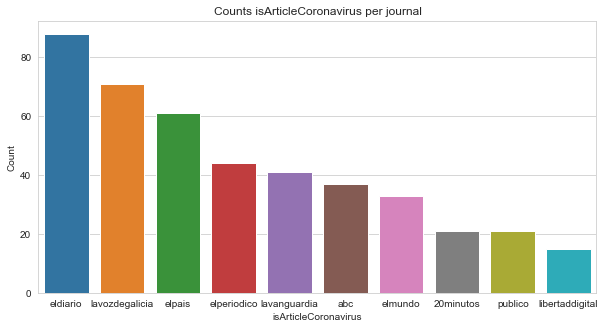

In [7]:
z=data_covid.groupby(by=['journal'],as_index=False).count().sort_values(by='isArticleCoronavirus',ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
ax = sns.barplot(x=z['journal'],y=z['isArticleCoronavirus'], data=z)
plt.xlabel("isArticleCoronavirus")
plt.ylabel("Count")
plt.title("Counts isArticleCoronavirus per journal")

In [8]:
def getSentiment(text):
    sentiment = sentiment_analysis.SentimentAnalysisSpanish()
    return sentiment.sentiment(text)

In [11]:
data_covid['sentiment'] = data_covid["title"].apply(getSentiment)


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [20]:
data_covid.groupby(['journal'])['sentiment'].mean().sort_values(ascending=False)

journal
20minutos          0.460245
lavanguardia       0.455009
publico            0.444463
elcorreo           0.443450
libertaddigital    0.432624
elperiodico        0.398102
elmundo            0.395640
lavozdegalicia     0.378380
elpais             0.361795
eldiario           0.344871
okdiario           0.328568
abc                0.238361
Name: sentiment, dtype: float64

[Text(0, 0, 'elpais'),
 Text(0, 0, 'okdiario'),
 Text(0, 0, 'eldiario'),
 Text(0, 0, 'elmundo'),
 Text(0, 0, 'lavanguardia'),
 Text(0, 0, 'libertaddigital'),
 Text(0, 0, 'publico'),
 Text(0, 0, 'abc'),
 Text(0, 0, '20minutos'),
 Text(0, 0, 'elperiodico'),
 Text(0, 0, 'lavozdegalicia'),
 Text(0, 0, 'elcorreo')]

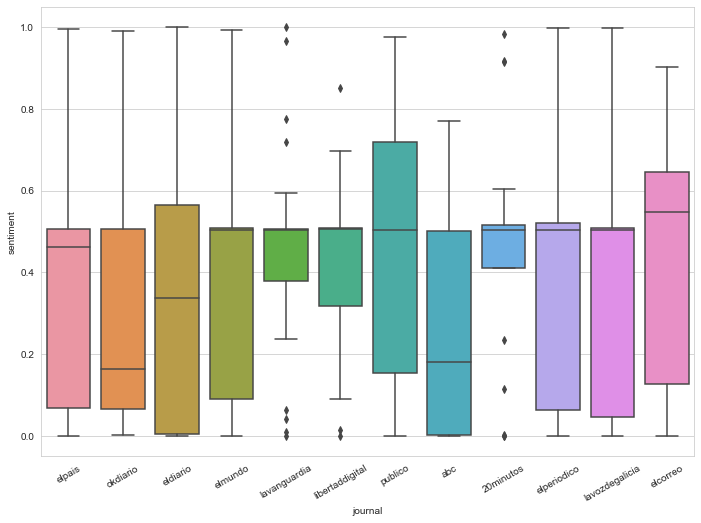

In [18]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
ic = sns.boxplot(x='journal', y='sentiment', data=data_covid)
ic.set_xticklabels(ic.get_xticklabels(),rotation=30)

In [27]:
list_keywords_monarchy = ["Juan Carlos I", "Juan Carlos", "emérito", "Don Juan Carlos", "El Rey"]


In [28]:
def isMonarchy(text):
        if any(word in text for word in list_keywords_monarchy):
            return 1
        else:
            return 0

In [29]:
data['isArticleMonarchy'] = data["title"].apply(isMonarchy)

In [30]:
data_monarchy = data[data.isArticleMonarchy == 1]

In [31]:
data_monarchy.head()

,Unnamed: 0,title,text,authors,journal,isArticleMonarchy
84,85,La Mesa del Congreso vuelve a rechazar las com...,La Mesa del Congreso ha impedido este martes l...,"['Javier Casqueiro', 'Zipi']",elpais,1
306,390,Elena de Borbón la hija más cercana al rey em...,La infanta Elena se ha convertido en estos tie...,"['Mábel Galaz', 'Slv']",elpais,1
734,1041,Moncloa y Zarzuela paran los pies al rey eméri...,El deseo del Rey emérito de volver a España po...,[],okdiario,1
740,1047,Juan Carlos Monedero relanza la fundación de P...,El cofundador de Podemos Juan Carlos Monedero ...,[],okdiario,1
745,1053,Rey Juan carlos I El emérito insiste en desob...,La Casa Real y el Gobierno no quieren que Don ...,[],okdiario,1


In [32]:
data_monarchy['sentiment'] = data_monarchy["title"].apply(getSentiment)


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [33]:
data_monarchy.size

231

In [35]:
data_monarchy.groupby(['journal'])['sentiment'].mean().sort_values(ascending=False)

journal
okdiario           0.720914
libertaddigital    0.618324
20minutos          0.560707
eldiario           0.439512
publico            0.378543
lavozdegalicia     0.259623
elpais             0.235153
lavanguardia       0.067348
elperiodico        0.054097
abc                0.034016
elcorreo           0.000192
Name: sentiment, dtype: float64

[Text(0, 0, 'elpais'),
 Text(0, 0, 'okdiario'),
 Text(0, 0, 'eldiario'),
 Text(0, 0, 'lavanguardia'),
 Text(0, 0, 'libertaddigital'),
 Text(0, 0, 'publico'),
 Text(0, 0, 'abc'),
 Text(0, 0, '20minutos'),
 Text(0, 0, 'elperiodico'),
 Text(0, 0, 'lavozdegalicia'),
 Text(0, 0, 'elcorreo')]

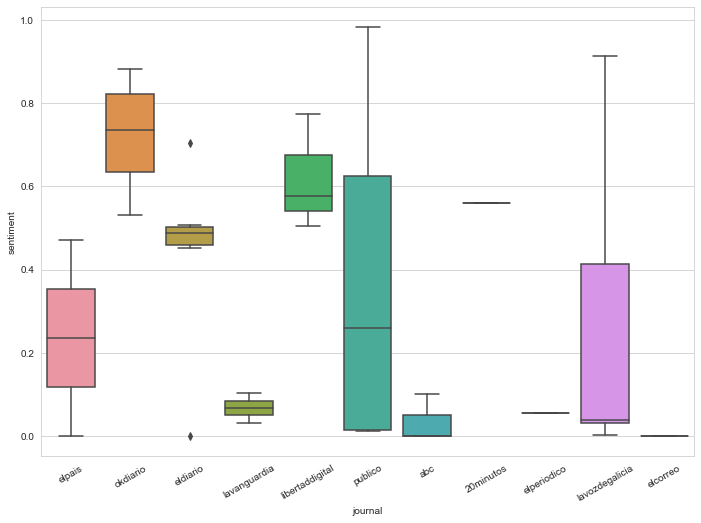

In [36]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
ic = sns.boxplot(x='journal', y='sentiment', data=data_monarchy)
ic.set_xticklabels(ic.get_xticklabels(),rotation=30)